In [ ]:
!git clone https://github.com/Aldoraaaa/CaseBDC12.git

fatal: destination path 'CaseBDC12' already exists and is not an empty directory.


In [ ]:
!pip install emoji
!pip install nlp_id
!pip install emoji
!pip install transformers
!pip install torch


  Using cached huggingface_hub-0.31.1-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.31.1-py3-none-any.whl (484 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.34.3
    Uninstalling huggingface-hub-0.34.3:
      Successfully uninstalled huggingface-hub-0.34.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.39.0 requires huggingface-hub<1.0,>=0.33.5, but you have huggingface-hub 0.31.1 which is incompatible.
transformers 4.54.1 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.31.1 which is incompatible.
  Using cached huggingface_hub-0.34.3-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.34.3-py3-none-any.whl (558 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.31.1
    Uninstalling huggingface-hub-0.31.1:

### Library

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go

#pembersihan text twitee
import os
import pickle
import re,string
import emoji
import unicodedata
from html import unescape
import warnings ; warnings,warnings.simplefilter ('ignore')
import nltk
from nlp_id.stopword import StopWord
nltk.download('stopwords')
nltk.download('punkt')

#preprocessing and text handling
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
KampanyeLUR= pd.read_excel('/content/CaseBDC12/sampel_data_semifinal_satria_data_2024.xlsx')
KampanyeLUR.head()

created_at tcode  num_retweets  type  frn_cnt  flw_cnt  sts_cnt  \
0 2024-01-04 16:57:09    rt        1248.0  twit    266.0    107.0   9687.0   
1 2024-01-04 16:57:09    rt         195.0  twit    564.0    303.0  12461.0   
2 2024-01-04 16:57:10    rt         116.0  twit    376.0    156.0   7488.0   
3 2024-01-04 16:57:10    rt        2264.0  twit    163.0    203.0   2065.0   
4 2024-01-04 16:57:11    rt        1157.0  twit      1.0      1.0    798.0   

              loc  lst_cnt                                            content  \
0             NaN      0.0  RT K-Popers Berencana Kirim Food Truck untuk A...   
1  indonesia kaya      2.0  RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   
2       Indonesia      1.0  RT Viral , Gimana Mak Mak di jakarta tidak ter...   
3             NaN      0.0  RT Mendengar Pak Anies disini, rasanya saya su...   
4             NaN      0.0  RT Media Asing Soroti Cara Anies Gaet Pemilih ...   

  lang  
0   id  
1   id  
2   id  
3   id  
4   id

In [ ]:
KampanyeLUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    49987 non-null  datetime64[ns]
 1   tcode         49993 non-null  object        
 2   num_retweets  49987 non-null  float64       
 3   type          49990 non-null  object        
 4   frn_cnt       49987 non-null  float64       
 5   flw_cnt       49987 non-null  float64       
 6   sts_cnt       49987 non-null  float64       
 7   loc           20867 non-null  object        
 8   lst_cnt       49979 non-null  float64       
 9   content       49979 non-null  object        
 10  lang          49979 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 4.2+ MB


In [ ]:
KampanyeLUR.isnull().sum()

created_at         13
tcode               7
num_retweets       13
type               10
frn_cnt            13
flw_cnt            13
sts_cnt            13
loc             29133
lst_cnt            21
content            21
lang               21
dtype: int64

In [ ]:
KampanyeLUR.duplicated().sum()

np.int64(45)

In [ ]:
# Hapus baris yang memiliki NaN di kolom 'content'
KampanyeLUR.dropna(subset=['content'], inplace=True)

# (Opsional) Reset index setelah penghapusan
KampanyeLUR.reset_index(drop=True, inplace=True)
KampanyeLUR['content'].isna().sum()

np.int64(0)

In [ ]:
KampanyeLUR.isnull().sum()

created_at          0
tcode               0
num_retweets        0
type                0
frn_cnt             0
flw_cnt             0
sts_cnt             0
loc             29120
lst_cnt             0
content             0
lang                0
dtype: int64

In [ ]:
KampanyeLUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49979 entries, 0 to 49978
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    49979 non-null  datetime64[ns]
 1   tcode         49979 non-null  object        
 2   num_retweets  49979 non-null  float64       
 3   type          49979 non-null  object        
 4   frn_cnt       49979 non-null  float64       
 5   flw_cnt       49979 non-null  float64       
 6   sts_cnt       49979 non-null  float64       
 7   loc           20859 non-null  object        
 8   lst_cnt       49979 non-null  float64       
 9   content       49979 non-null  object        
 10  lang          49979 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 4.2+ MB


### DEEP CLEANSING KOLOM CONTENT

In [ ]:
from typing_extensions import Text
# Menghilangkan Emoji Korup
def emoji_korup(text):
    try:
        kalimat = text.encode('latin1').decode('unicode-escape').encode('latin1').decode('utf8')
    except:
          pass
    return emoji.replace_emoji(text,replace='')

# Menghilangkan semua karakter terkait HTML
import html
def remove_html(text):
  text = html.unescape(text)
  pola_tag = re.compile(r'<.*?>')
  text = pola_tag.sub(r'',text)
  regex_str = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
  pola_url = re.compile(regex_str)
  text = pola_url.sub(r'',text)
  return text

# Membuat Fungsi Untuk Mengganti Karakter yang tidak sesuai dengan standar Non-ASCII menggunakan value equivalent
def kalimat_standar(text):
  text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
  return text

# Menghilangkan link, mentions dan membuat kalimat baru
def pembersihan_linkmentions(text):
    text = text.lower()
    text = text.replace('\r','').replace('\n','')  # hapus karakter baris baru
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # hapus mentions & link
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # hapus karakter non-UTF8
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))  # hapus tanda baca
    text = ' '.join(word for word in text.split() if not word.isnumeric())  # hapus angka
    text = re.sub(r'\b\w\b', "", text)  # hapus kata satu huruf (opsional)
    text = re.sub(r"(username|url|user|rt)\s|\s(user|url|rt)", "", text)  # hapus kata tertentu
    text = ' '.join(word for word in text.split() if 1 < len(word) < 20)  # filter kata: 2-19 huruf
    return text.strip()


# Menghilangkan Spasi
def hapus_spasi(text):
  text = re.sub(r'\s\s+'," ",text)
  return text

# Preprocessing
def preprocess_text(text):
    text = emoji_korup(text)
    text = remove_html(text)
    text = kalimat_standar(text)
    text = pembersihan_linkmentions(text)
    text = hapus_spasi(text)
    return text

In [ ]:
# Pembersihan Data
def Pembersihan_Data(text): #fungsi membersihakan text
    text = unescape(text) # mengubah simbol menjadi simbol dalam proses decoding
    text = unescape(text) # encodeing/ mengubah simbol menjadi data menjadi kata

    Ambil_Hastag = re.compile(r"#(\w+)")
    pisahkan_Hastag= re.compile(r'[A-Z][^A-Z]*')
    Tag = re.findall(Ambil_Hastag,text)
    for tag in Tag :
      OutputFilter = ''.join(re.findall(pisahkan_Hastag,tag))
      text = text.replace('#'+tag,OutputFilter) # mengganti hastag menjadi kata dasar
    Lowercase =str(text).lower()
    return text

In [ ]:
Kalimat_Baru = KampanyeLUR['content'].values
Kalimat_Baru

array(['RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw #TempoSeleb [RE tempodotco]',
       'RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir]',
       'RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]',
       ...,
       'Dukungan penuh buat Ganjar-Mahfud, karena mereka udah membuktikan bahwa janji-janji mereka bukan sekedar omong kosong @CqMgEBM7NCHKbyqDBHi/gTPjoywVviWNEYHWRyOSl6I= #GanjarMahfud2024 #3MandatGanjarMahfud #L3bihbaik https://t.co/Y7THQRGqPg',
       'RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya Lubis mengingatkan tim pemenangan daerah (TPD) untuk mengumpulkan bukti dan dokumentasi kecurangan. #newsupdate #update #news #text https://t.co/273LdUgm

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(Pembersihan_Data(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru

['RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw TempoSeleb [RE tempodotco]',
 'RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir]',
 'RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]',
 'RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our co

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(emoji_korup(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru[:15]

['RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw TempoSeleb [RE tempodotco]',
 'RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir]',
 'RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]',
 'RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our co

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(remove_html(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru[:15]

['RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies  TempoSeleb [RE tempodotco]',
 'RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ????  [RE Yurissa_Samosir]',
 'RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ...   [RE STresnowati1]',
 'RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities. What do you guys think? Â  [RE tomlembong]',
 "RT Media Asing Soroti Cara Anies G

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(kalimat_standar(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru[:15]

['RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies  TempoSeleb [RE tempodotco]',
 'RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ????  [RE Yurissa_Samosir]',
 'RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ...   [RE STresnowati1]',
 'RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanA2 yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanA2 semua? ----A Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities. What do you guys think? A  [RE tomlembong]',
 "RT Media Asing Soroti Cara Anies G

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(pembersihan_linkmentions(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru[:15]

['popers berencana kirim food truck untuk anies baswedan di acara desak anies temposeleb re tempodotco',
 'bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul re yurissa samosir',
 'viral gimana mak mak di jakarta tidak ter anies anies re stresnowati1',
 'mendengar pak anies disini rasanya saya sudah berada di perahu yang tepat menurut saya pak anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalana2 yg nyata betul ada di kehidupan bermasyarakat bagaimana menurut kawana2 semua listening to pak anies here know am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do you guys think re tomlembong',
 'media asing soroti cara anies gaet pemilih muda pakai desak anies re cnnindonesia',
 'mendengar pa

In [ ]:
PembersihanLanjutan = []
for t in Kalimat_Baru:
  PembersihanLanjutan.append(hapus_spasi(t))
Kalimat_Baru = PembersihanLanjutan
Kalimat_Baru[:15]

['popers berencana kirim food truck untuk anies baswedan di acara desak anies temposeleb re tempodotco',
 'bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul re yurissa samosir',
 'viral gimana mak mak di jakarta tidak ter anies anies re stresnowati1',
 'mendengar pak anies disini rasanya saya sudah berada di perahu yang tepat menurut saya pak anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalana2 yg nyata betul ada di kehidupan bermasyarakat bagaimana menurut kawana2 semua listening to pak anies here know am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do you guys think re tomlembong',
 'media asing soroti cara anies gaet pemilih muda pakai desak anies re cnnindonesia',
 'mendengar pa

### CHECK DATA

In [ ]:
# Melihat Data untuk lenghth dari row setelah dibersihkan
print('data length: ',len(Kalimat_Baru))

print('\n Data Frame Perbandingan ')
# Import texts baru ke dataframe
KampanyeLUR['text_clean'] = Kalimat_Baru
KampanyeLUR

data length:  49979

 Data Frame Perbandingan 


created_at    tcode  num_retweets  type  frn_cnt  flw_cnt  \
0     2024-01-04 16:57:09       rt        1248.0  twit    266.0    107.0   
1     2024-01-04 16:57:09       rt         195.0  twit    564.0    303.0   
2     2024-01-04 16:57:10       rt         116.0  twit    376.0    156.0   
3     2024-01-04 16:57:10       rt        2264.0  twit    163.0    203.0   
4     2024-01-04 16:57:11       rt        1157.0  twit      1.0      1.0   
...                   ...      ...           ...   ...      ...      ...   
49974 2024-01-04 15:25:24       rt        1066.0  twit    558.0    469.0   
49975 2024-01-04 15:25:24       rt          74.0  twit   1177.0   2193.0   
49976 2024-01-04 15:25:25  mention           0.0  twit     43.0     20.0   
49977 2024-01-04 15:25:25       rt          91.0  twit    186.0    160.0   
49978 2024-01-04 15:25:25       rt        1111.0  twit    320.0     64.0   

        sts_cnt             loc  lst_cnt  \
0        9687.0             NaN      0.0   
1       12461.0  indonesia kaya      2.0   
2        7488.0       Indonesia      1.0   
3        2065.0             NaN      0.0   
4         798.0             NaN      0.0   
...         ...             ...      ...   
49974    6705.0             NaN      0.0   
49975  203259.0     first realm      8.0   
49976    1161.0           Depok      0.0   
49977     730.0             NaN      0.0   
49978    2359.0        Denpasar      0.0   

                                                 content lang  \
0      RT K-Popers Berencana Kirim Food Truck untuk A...   id   
1      RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   id   
2      RT Viral , Gimana Mak Mak di jakarta tidak ter...   id   
3      RT Mendengar Pak Anies disini, rasanya saya su...   id   
4      RT Media Asing Soroti Cara Anies Gaet Pemilih ...   id   
...                                                  ...  ...   
49974  RT #EkspedisiAMIN di Sumbar kami mulai dengan ...   id   
49975  RT Anies Baswedan padahal gampang banget kalo ...   id   
49976  Dukungan penuh buat Ganjar-Mahfud, karena mere...   id   
49977  RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya...   id   
49978  RT Mas @X6yTTs2bXiCuxhVIMKFuwzWovaSi1j9yXIXGoP...   id   

                                              text_clean  
0      popers berencana kirim food truck untuk anies ...  
1      bapak pendeta yusak ini dari magetan ke ponoro...  
2      viral gimana mak mak di jakarta tidak ter anie...  
3      mendengar pak anies disini rasanya saya sudah ...  
4      media asing soroti cara anies gaet pemilih mud...  
...                                                  ...  
49974  ekspedisiamin di sumbar kami mulai dengan desa...  
49975  anies baswedan padahal gampang banget kalo mau...  
49976  dukungan penuh buat ganjar mahfud karena merek...  
49977  deputi hukum tpn ganjar mahfud todung mulya lu...  
49978  mas sy juga china kristen bukan warga jkt tp i...  

[49979 rows x 12 columns]

In [ ]:
#Splitting Labeled
KampanyeLUR_baru =KampanyeLUR[KampanyeLUR['text_clean'].notnull()]
KampanyeLUR_baru

created_at    tcode  num_retweets  type  frn_cnt  flw_cnt  \
0     2024-01-04 16:57:09       rt        1248.0  twit    266.0    107.0   
1     2024-01-04 16:57:09       rt         195.0  twit    564.0    303.0   
2     2024-01-04 16:57:10       rt         116.0  twit    376.0    156.0   
3     2024-01-04 16:57:10       rt        2264.0  twit    163.0    203.0   
4     2024-01-04 16:57:11       rt        1157.0  twit      1.0      1.0   
...                   ...      ...           ...   ...      ...      ...   
49974 2024-01-04 15:25:24       rt        1066.0  twit    558.0    469.0   
49975 2024-01-04 15:25:24       rt          74.0  twit   1177.0   2193.0   
49976 2024-01-04 15:25:25  mention           0.0  twit     43.0     20.0   
49977 2024-01-04 15:25:25       rt          91.0  twit    186.0    160.0   
49978 2024-01-04 15:25:25       rt        1111.0  twit    320.0     64.0   

        sts_cnt             loc  lst_cnt  \
0        9687.0             NaN      0.0   
1       12461.0  indonesia kaya      2.0   
2        7488.0       Indonesia      1.0   
3        2065.0             NaN      0.0   
4         798.0             NaN      0.0   
...         ...             ...      ...   
49974    6705.0             NaN      0.0   
49975  203259.0     first realm      8.0   
49976    1161.0           Depok      0.0   
49977     730.0             NaN      0.0   
49978    2359.0        Denpasar      0.0   

                                                 content lang  \
0      RT K-Popers Berencana Kirim Food Truck untuk A...   id   
1      RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   id   
2      RT Viral , Gimana Mak Mak di jakarta tidak ter...   id   
3      RT Mendengar Pak Anies disini, rasanya saya su...   id   
4      RT Media Asing Soroti Cara Anies Gaet Pemilih ...   id   
...                                                  ...  ...   
49974  RT #EkspedisiAMIN di Sumbar kami mulai dengan ...   id   
49975  RT Anies Baswedan padahal gampang banget kalo ...   id   
49976  Dukungan penuh buat Ganjar-Mahfud, karena mere...   id   
49977  RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya...   id   
49978  RT Mas @X6yTTs2bXiCuxhVIMKFuwzWovaSi1j9yXIXGoP...   id   

                                              text_clean  
0      popers berencana kirim food truck untuk anies ...  
1      bapak pendeta yusak ini dari magetan ke ponoro...  
2      viral gimana mak mak di jakarta tidak ter anie...  
3      mendengar pak anies disini rasanya saya sudah ...  
4      media asing soroti cara anies gaet pemilih mud...  
...                                                  ...  
49974  ekspedisiamin di sumbar kami mulai dengan desa...  
49975  anies baswedan padahal gampang banget kalo mau...  
49976  dukungan penuh buat ganjar mahfud karena merek...  
49977  deputi hukum tpn ganjar mahfud todung mulya lu...  
49978  mas sy juga china kristen bukan warga jkt tp i...  

[49979 rows x 12 columns]

In [ ]:
#Cek duplikat setelah pembersihan
print('shape:',KampanyeLUR_baru.shape)
print('Duplicated:' ,KampanyeLUR_baru['text_clean'].duplicated().sum())
KampanyeLUR_baru[KampanyeLUR_baru['text_clean'].duplicated()]

shape: (49979, 12)
Duplicated: 32684


created_at tcode  num_retweets  type  frn_cnt  flw_cnt  \
5     2024-01-04 16:57:12    rt        2264.0  twit     58.0      4.0   
10    2024-01-04 16:57:14    rt          10.0  twit     43.0     27.0   
11    2024-01-04 16:57:15    rt          10.0  twit     24.0     12.0   
14    2024-01-04 16:57:16    rt          10.0  twit     43.0     27.0   
17    2024-01-04 16:57:17    rt          10.0  twit    330.0   1666.0   
...                   ...   ...           ...   ...      ...      ...   
49973 2024-01-04 15:25:24    rt         352.0  twit    472.0   1291.0   
49974 2024-01-04 15:25:24    rt        1066.0  twit    558.0    469.0   
49975 2024-01-04 15:25:24    rt          74.0  twit   1177.0   2193.0   
49977 2024-01-04 15:25:25    rt          91.0  twit    186.0    160.0   
49978 2024-01-04 15:25:25    rt        1111.0  twit    320.0     64.0   

        sts_cnt          loc  lst_cnt  \
5         243.0          NaN      0.0   
10      61001.0          NaN      0.0   
11      60158.0          NaN      0.0   
14      61001.0          NaN      0.0   
17      64378.0      jakarta      3.0   
...         ...          ...      ...   
49973  232313.0          NaN      0.0   
49974    6705.0          NaN      0.0   
49975  203259.0  first realm      8.0   
49977     730.0          NaN      0.0   
49978    2359.0     Denpasar      0.0   

                                                 content lang  \
5      RT Mendengar Pak Anies disini, rasanya saya su...   id   
10     RT Kapitalisme neoliberal tak cocok untuk Indo...   id   
11     RT Kapitalisme neoliberal tak cocok untuk Indo...   id   
14     RT Kapitalisme neoliberal tak cocok untuk Indo...   id   
17     RT Kapitalisme neoliberal tak cocok untuk Indo...   id   
...                                                  ...  ...   
49973  RT Catatan ini Buat Pendukung Wowo Kalau Pak A...   id   
49974  RT #EkspedisiAMIN di Sumbar kami mulai dengan ...   id   
49975  RT Anies Baswedan padahal gampang banget kalo ...   id   
49977  RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya...   id   
49978  RT Mas @X6yTTs2bXiCuxhVIMKFuwzWovaSi1j9yXIXGoP...   id   

                                              text_clean  
5      mendengar pak anies disini rasanya saya sudah ...  
10     kapitalisme neoliberal tak cocok untuk indones...  
11     kapitalisme neoliberal tak cocok untuk indones...  
14     kapitalisme neoliberal tak cocok untuk indones...  
17     kapitalisme neoliberal tak cocok untuk indones...  
...                                                  ...  
49973  catatan ini buat pendukung wowo kalau pak anie...  
49974  ekspedisiamin di sumbar kami mulai dengan desa...  
49975  anies baswedan padahal gampang banget kalo mau...  
49977  deputi hukum tpn ganjar mahfud todung mulya lu...  
49978  mas sy juga china kristen bukan warga jkt tp i...  

[32684 rows x 12 columns]

In [ ]:
#Cek sell kosong
KampanyeLUR_baru.isna().sum()

created_at          0
tcode               0
num_retweets        0
type                0
frn_cnt             0
flw_cnt             0
sts_cnt             0
loc             29120
lst_cnt             0
content             0
lang                0
text_clean          0
dtype: int64

In [ ]:
KampanyeLUR_baru.isna().sum()

created_at          0
tcode               0
num_retweets        0
type                0
frn_cnt             0
flw_cnt             0
sts_cnt             0
loc             29120
lst_cnt             0
content             0
lang                0
text_clean          0
dtype: int64

In [ ]:
#Contain only space row
KampanyeLUR_baru[KampanyeLUR_baru['text_clean'] == '']

created_at  tcode  num_retweets  type  frn_cnt  flw_cnt  \
5403  2024-01-02 03:57:24  reply           0.0  twit    188.0     20.0   
6049  2024-01-02 04:15:22  reply           0.0  twit    110.0    163.0   
6054  2024-01-02 04:15:30  reply           0.0  twit    110.0    163.0   
6108  2024-01-02 04:17:55  reply           0.0  twit    758.0     29.0   
6302  2024-01-02 04:24:00  reply           0.0  twit     65.0      8.0   
...                   ...    ...           ...   ...      ...      ...   
48122 2024-01-04 15:17:24  reply           0.0  twit   4068.0  10940.0   
48188 2024-01-04 15:17:38  reply           0.0  twit    856.0    251.0   
48274 2024-01-04 15:18:00  reply           0.0  twit     24.0      5.0   
48494 2024-01-04 15:18:54  reply           0.0  twit   1510.0   1385.0   
49208 2024-01-04 15:22:04  reply           0.0  twit    856.0    251.0   

       sts_cnt      loc  lst_cnt  \
5403    1214.0      NaN      0.0   
6049    3734.0      NaN      0.0   
6054    3734.0      NaN      0.0   
6108     206.0  jakarta      0.0   
6302     927.0      NaN      0.0   
...        ...      ...      ...   
48122  33334.0      NaN      5.0   
48188   2457.0    Tawau      0.0   
48274    529.0      NaN      0.0   
48494   3013.0      NaN      0.0   
49208   2457.0    Tawau      0.0   

                                                 content lang text_clean  
5403   @X3PdsT0s+nosDiSVDq3nQPNxLKQV1ZMBl5NDSXLLnOs= ...   id             
6049   @X8WbdIQJZZ1vOLRAmuDcpvVtGFM9bA4K4sQZhwVQEI4= ...   id             
6054   @Z8HgD10wR3d4Ryc6kbLGmzvj3B8J4ktp7qNJKltZRRk= ...   id             
6108   @fA1HuCxxTOk0JZPbtLRhIT5PApLS3zZGON2dts/ZLSA= ...   id             
6302   @bpodF9gdSau/+XsbME0GYyTByEGNtqM5qSw+/Sjq9sw= ...   id             
...                                                  ...  ...        ...  
48122  @1c3jtoFc/mRxXAZQRWxzqSj+jGtw3G/aq0bFfONSXi8= ...   id             
48188  @oFf3opPwHjfz3DxppsKNnfXArsTIBtB+2aSYGRhiWzE= ...   id             
48274  @VIBzflnQ+R9dPb7+aEPPOrkj3EmPtLSOJHNaSr4fffQ= ...   id             
48494  @YgXAauccCTLW5i+hVN48OMd2xerTnwFbp+ydmjYt0z8= ...   id             
49208  @iFKmE/dTIHB5XUiuCTm6OtA2zE2DiH/LNwnfuztFPQ4= ...   id             

[68 rows x 12 columns]

In [ ]:
KampanyeLUR_baru.drop(KampanyeLUR_baru[KampanyeLUR_baru['text_clean'] == ''].index, inplace=True)

In [ ]:
#Contain only space row
KampanyeLUR_baru[KampanyeLUR_baru['text_clean'] == '']

Empty DataFrame
Columns: [created_at, tcode, num_retweets, type, frn_cnt, flw_cnt, sts_cnt, loc, lst_cnt, content, lang, text_clean]
Index: []

In [ ]:
#Cek panjang kata setelah cleaning
KampanyeLUR_baru['Length']=KampanyeLUR_baru['text_clean'].str.split().map(lambda x : len(x))
KampanyeLUR_baru

created_at    tcode  num_retweets  type  frn_cnt  flw_cnt  \
0     2024-01-04 16:57:09       rt        1248.0  twit    266.0    107.0   
1     2024-01-04 16:57:09       rt         195.0  twit    564.0    303.0   
2     2024-01-04 16:57:10       rt         116.0  twit    376.0    156.0   
3     2024-01-04 16:57:10       rt        2264.0  twit    163.0    203.0   
4     2024-01-04 16:57:11       rt        1157.0  twit      1.0      1.0   
...                   ...      ...           ...   ...      ...      ...   
49974 2024-01-04 15:25:24       rt        1066.0  twit    558.0    469.0   
49975 2024-01-04 15:25:24       rt          74.0  twit   1177.0   2193.0   
49976 2024-01-04 15:25:25  mention           0.0  twit     43.0     20.0   
49977 2024-01-04 15:25:25       rt          91.0  twit    186.0    160.0   
49978 2024-01-04 15:25:25       rt        1111.0  twit    320.0     64.0   

        sts_cnt             loc  lst_cnt  \
0        9687.0             NaN      0.0   
1       12461.0  indonesia kaya      2.0   
2        7488.0       Indonesia      1.0   
3        2065.0             NaN      0.0   
4         798.0             NaN      0.0   
...         ...             ...      ...   
49974    6705.0             NaN      0.0   
49975  203259.0     first realm      8.0   
49976    1161.0           Depok      0.0   
49977     730.0             NaN      0.0   
49978    2359.0        Denpasar      0.0   

                                                 content lang  \
0      RT K-Popers Berencana Kirim Food Truck untuk A...   id   
1      RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   id   
2      RT Viral , Gimana Mak Mak di jakarta tidak ter...   id   
3      RT Mendengar Pak Anies disini, rasanya saya su...   id   
4      RT Media Asing Soroti Cara Anies Gaet Pemilih ...   id   
...                                                  ...  ...   
49974  RT #EkspedisiAMIN di Sumbar kami mulai dengan ...   id   
49975  RT Anies Baswedan padahal gampang banget kalo ...   id   
49976  Dukungan penuh buat Ganjar-Mahfud, karena mere...   id   
49977  RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya...   id   
49978  RT Mas @X6yTTs2bXiCuxhVIMKFuwzWovaSi1j9yXIXGoP...   id   

                                              text_clean  Length  
0      popers berencana kirim food truck untuk anies ...      15  
1      bapak pendeta yusak ini dari magetan ke ponoro...      30  
2      viral gimana mak mak di jakarta tidak ter anie...      12  
3      mendengar pak anies disini rasanya saya sudah ...      79  
4      media asing soroti cara anies gaet pemilih mud...      13  
...                                                  ...     ...  
49974  ekspedisiamin di sumbar kami mulai dengan desa...      86  
49975  anies baswedan padahal gampang banget kalo mau...      31  
49976  dukungan penuh buat ganjar mahfud karena merek...      20  
49977  deputi hukum tpn ganjar mahfud todung mulya lu...      21  
49978  mas sy juga china kristen bukan warga jkt tp i...      38  

[49911 rows x 13 columns]

In [ ]:
KampanyeLUR_baru['tcode'].value_counts()

tcode
rt         28558
mention    14209
reply       7144
Name: count, dtype: int64

### Clustering

In [ ]:
KampanyeLUR_baru['text_clean']

0        popers berencana kirim food truck untuk anies ...
1        bapak pendeta yusak ini dari magetan ke ponoro...
2        viral gimana mak mak di jakarta tidak ter anie...
3        mendengar pak anies disini rasanya saya sudah ...
4        media asing soroti cara anies gaet pemilih mud...
                               ...                        
49974    ekspedisiamin di sumbar kami mulai dengan desa...
49975    anies baswedan padahal gampang banget kalo mau...
49976    dukungan penuh buat ganjar mahfud karena merek...
49977    deputi hukum tpn ganjar mahfud todung mulya lu...
49978    mas sy juga china kristen bukan warga jkt tp i...
Name: text_clean, Length: 49911, dtype: object

In [ ]:
KampanyeLUR_baru

created_at    tcode  num_retweets  type  frn_cnt  flw_cnt  \
0     2024-01-04 16:57:09       rt        1248.0  twit    266.0    107.0   
1     2024-01-04 16:57:09       rt         195.0  twit    564.0    303.0   
2     2024-01-04 16:57:10       rt         116.0  twit    376.0    156.0   
3     2024-01-04 16:57:10       rt        2264.0  twit    163.0    203.0   
4     2024-01-04 16:57:11       rt        1157.0  twit      1.0      1.0   
...                   ...      ...           ...   ...      ...      ...   
49974 2024-01-04 15:25:24       rt        1066.0  twit    558.0    469.0   
49975 2024-01-04 15:25:24       rt          74.0  twit   1177.0   2193.0   
49976 2024-01-04 15:25:25  mention           0.0  twit     43.0     20.0   
49977 2024-01-04 15:25:25       rt          91.0  twit    186.0    160.0   
49978 2024-01-04 15:25:25       rt        1111.0  twit    320.0     64.0   

        sts_cnt             loc  lst_cnt  \
0        9687.0             NaN      0.0   
1       12461.0  indonesia kaya      2.0   
2        7488.0       Indonesia      1.0   
3        2065.0             NaN      0.0   
4         798.0             NaN      0.0   
...         ...             ...      ...   
49974    6705.0             NaN      0.0   
49975  203259.0     first realm      8.0   
49976    1161.0           Depok      0.0   
49977     730.0             NaN      0.0   
49978    2359.0        Denpasar      0.0   

                                                 content lang  \
0      RT K-Popers Berencana Kirim Food Truck untuk A...   id   
1      RT Bapak Pendeta Yusak ini Dari Magetan ke Pon...   id   
2      RT Viral , Gimana Mak Mak di jakarta tidak ter...   id   
3      RT Mendengar Pak Anies disini, rasanya saya su...   id   
4      RT Media Asing Soroti Cara Anies Gaet Pemilih ...   id   
...                                                  ...  ...   
49974  RT #EkspedisiAMIN di Sumbar kami mulai dengan ...   id   
49975  RT Anies Baswedan padahal gampang banget kalo ...   id   
49976  Dukungan penuh buat Ganjar-Mahfud, karena mere...   id   
49977  RT Deputi Hukum TPN Ganjar-Mahfud Todung Mulya...   id   
49978  RT Mas @X6yTTs2bXiCuxhVIMKFuwzWovaSi1j9yXIXGoP...   id   

                                              text_clean  Length    paslon  
0      popers berencana kirim food truck untuk anies ...      15  Paslon 1  
1      bapak pendeta yusak ini dari magetan ke ponoro...      30  Paslon 1  
2      viral gimana mak mak di jakarta tidak ter anie...      12  Paslon 1  
3      mendengar pak anies disini rasanya saya sudah ...      79  Paslon 1  
4      media asing soroti cara anies gaet pemilih mud...      13  Paslon 1  
...                                                  ...     ...       ...  
49974  ekspedisiamin di sumbar kami mulai dengan desa...      86  Paslon 1  
49975  anies baswedan padahal gampang banget kalo mau...      31  Paslon 1  
49976  dukungan penuh buat ganjar mahfud karena merek...      20  Paslon 2  
49977  deputi hukum tpn ganjar mahfud todung mulya lu...      21  Paslon 3  
49978  mas sy juga china kristen bukan warga jkt tp i...      38  Paslon 1  

[49911 rows x 14 columns]

In [ ]:
KampanyeLUR_baru.value_counts('paslon')

paslon
Paslon 1    22066
Paslon 2    16523
Paslon 3    10011
             1311
Name: count, dtype: int64

In [ ]:

Kampanyedataanonim = KampanyeLUR_baru[KampanyeLUR_baru['paslon'] == 'Tidak Diketahui']
Kampanyedataanonim


Empty DataFrame
Columns: [created_at, tcode, num_retweets, type, frn_cnt, flw_cnt, sts_cnt, loc, lst_cnt, content, lang, text_clean, Length, paslon]
Index: []

In [ ]:
stopword = StopWord()
stopword_list = stopword.get_stopword()

def remove_stopwords(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopword_list]
    return ' '.join(clean_words)

KampanyeLUR_baru['clean_stopword'] = KampanyeLUR_baru['text_clean'].apply(remove_stopwords)

In [ ]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(KampanyeLUR_baru['clean_stopword'])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)

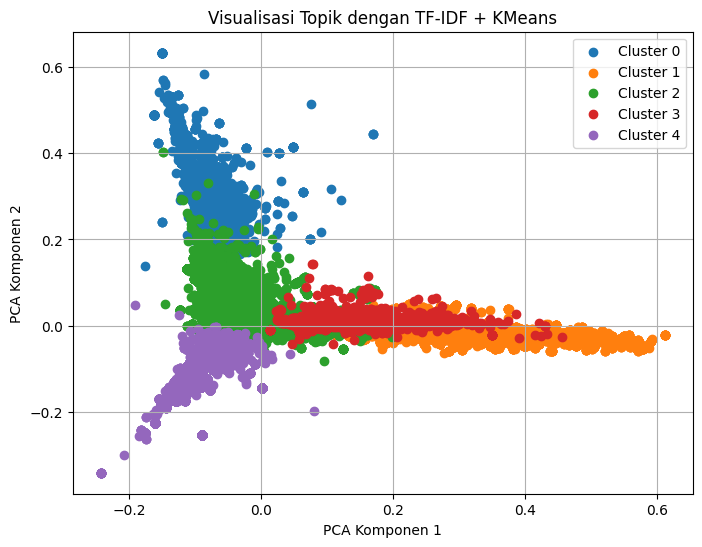

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f"Cluster {i}")
plt.title("Visualisasi Topik dengan TF-IDF + KMeans")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_tfidf.toarray())

# Add PCA results to the dataframe
KampanyeLUR_baru['pca_comp1'] = X_pca_3d[:, 0]
KampanyeLUR_baru['pca_comp2'] = X_pca_3d[:, 1]
KampanyeLUR_baru['pca_comp3'] = X_pca_3d[:, 2]
KampanyeLUR_baru['cluster'] = clusters

# Create a 3D scatter plot
fig = px.scatter_3d(KampanyeLUR_baru, x='pca_comp1', y='pca_comp2', z='pca_comp3',
                    color='cluster', title='3D PCA of TF-IDF with KMeans Clusters')
fig.show()

In [ ]:
import numpy as np

# Ambil fitur dari vectorizer
terms = vectorizer.get_feature_names_out()
n_top = 10  # banyak kata kunci per cluster

print("Topik per cluster:")
for i in range(5):
    cluster_idx = np.where(clusters == i)[0]
    cluster_tfidf = X_tfidf[cluster_idx].mean(axis=0)
    top_terms_idx = np.argsort(cluster_tfidf.A1)[::-1][:n_top]
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Topik per cluster:
Cluster 0: prabowo, tiadahenti, buktinyata, untukmelanjutkan, subianto, indonesiasentris, indonesiahijau, melanjutkan, pemimpin, indonesia
Cluster 1: jnk, ganjarmahfudrebound, pranowo, ganjar, md, mahfud, program, capres, pilih, pasangan
Cluster 2: prabowo, re, ganjar, gibran, mahfud, jokowi, anies, dukung, presiden, indonesia
Cluster 3: l3bihbaik, ganjarmahfud2024, mahfud, ganjar, mahfudlebihbaik3, hebat, mandatganjarmahfud, ganjarpranowo, pranowo, internet
Cluster 4: anies, re, desak, abah, baswedan, aminajadulu, sumbar, barat, tiktok, acara


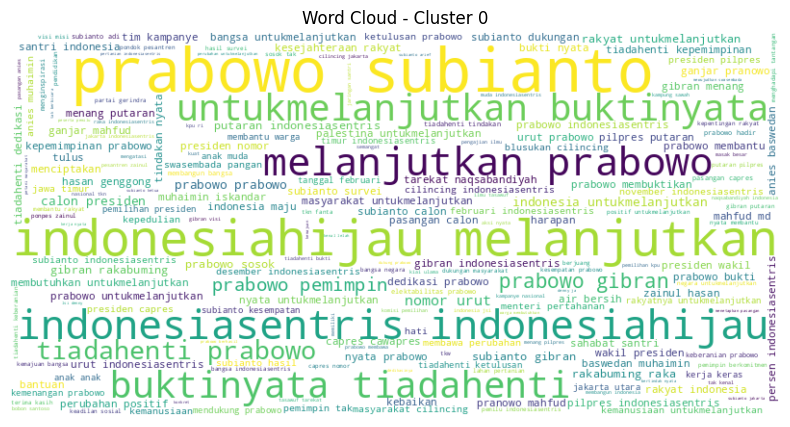

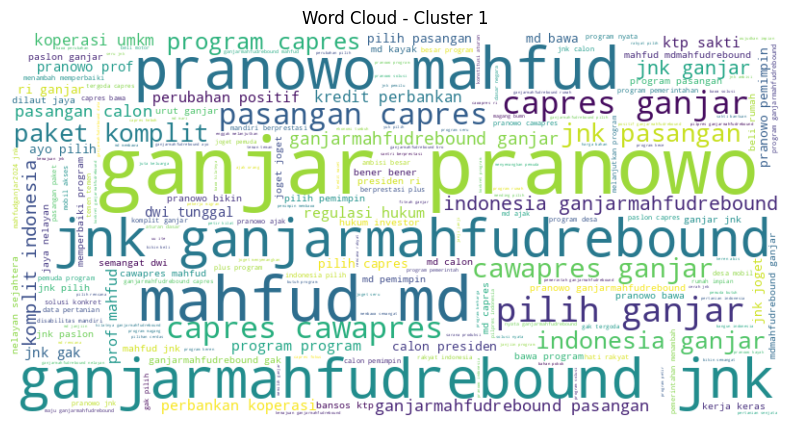

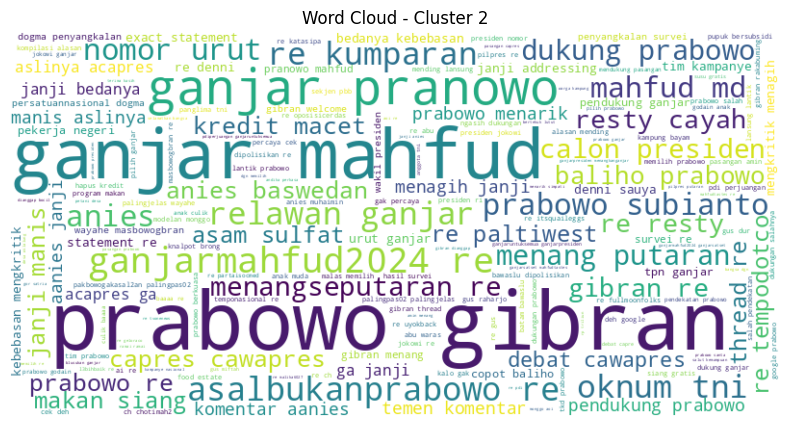

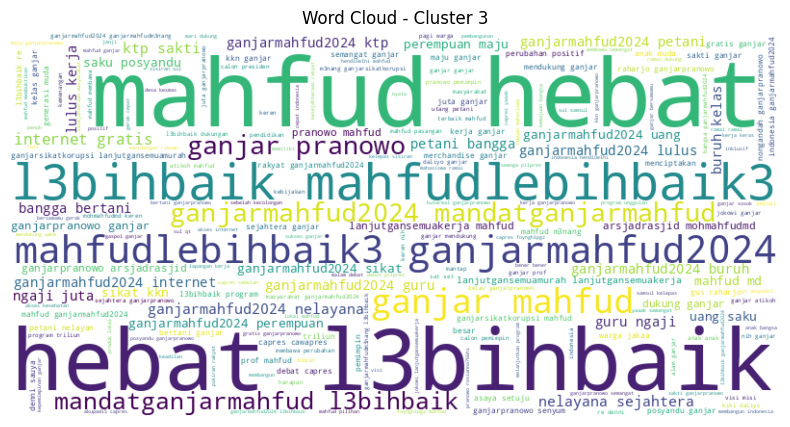

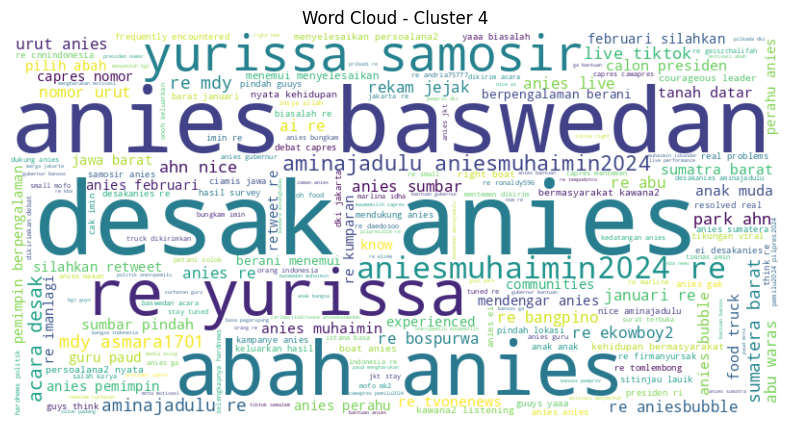

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(5):
    cluster_texts = KampanyeLUR_baru['clean_stopword'][clusters == i]
    combined_text = " ".join(cluster_texts)
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - Cluster {i}")
    plt.show()

In [ ]:
import numpy as np

#Tambahkan hasil cluster ke DataFrame asli
KampanyeLUR_baru['cluster'] = clusters
KampanyeLUR_baru['content_clean'] = KampanyeLUR_baru['clean_stopword']

# 2. Definisikan kata kunci tiap paslon
paslon_keywords = {
    'Anies-Amin': ['anies', 'imin', 'muhaimin', 'cak imin', 'cakimin', 'anis', 'amin', 'perubahan', 'salam perubahan', 'abah', '01', '1'],
    'Prabowo-Gibran': ['prabowo', 'owo', 'gibran', 'gemoy', 'wowo', 'pelanggar ham', 'nepo baby' 'keberlanjutan', 'ok gas', 'gas', 'ok gass', '02'],
    'Ganjar-Mahfud': ['ganjar', 'mahfud' 'gubernur jateng', 'bokep', '03']
}

# 3. Hitung frekuensi kata kunci per paslon per cluster
cluster_support = {paslon: [0]*5 for paslon in paslon_keywords}
for i in range(5):  # asumsi jumlah cluster = 5
    cluster_texts = " ".join(KampanyeLUR_baru[KampanyeLUR_baru['cluster'] == i]['content_clean'])
    for paslon, keywords in paslon_keywords.items():
        count = sum(cluster_texts.count(keyword) for keyword in keywords)
        cluster_support[paslon][i] = count

# 4. Cetak hasil
print("Distribusi dukungan berdasarkan keyword (semakin tinggi semakin kuat topik dominan):")
for paslon, counts in cluster_support.items():
    print(f"{paslon}: {counts}")

Distribusi dukungan berdasarkan keyword (semakin tinggi semakin kuat topik dominan):
Anies-Amin: [481, 802, 9349, 345, 49900]
Prabowo-Gibran: [11076, 7278, 38120, 5528, 3623]
Ganjar-Mahfud: [105, 15019, 12144, 9852, 72]


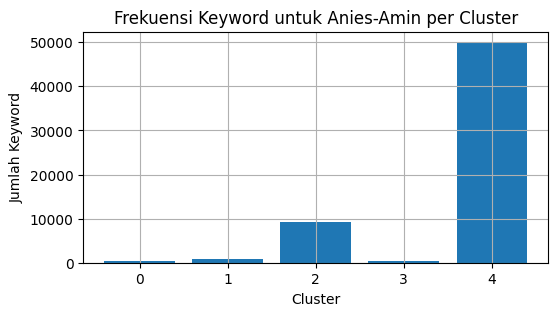

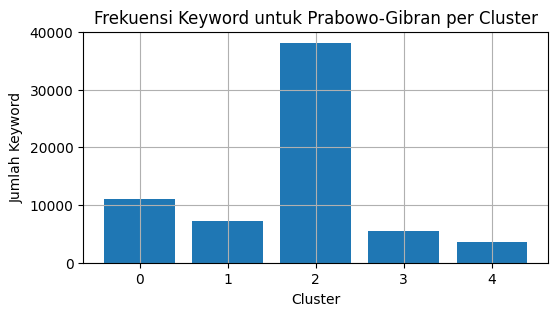

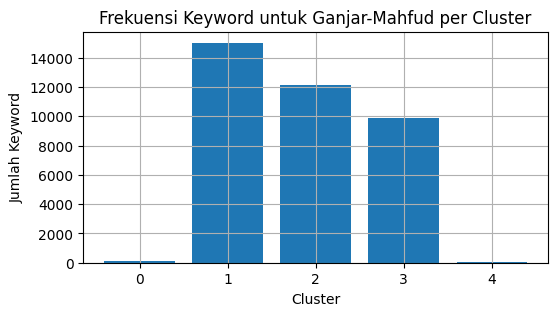

In [ ]:
import matplotlib.pyplot as plt

# Buat bar chart
for paslon, counts in cluster_support.items():
    plt.figure(figsize=(6, 3))
    plt.bar(range(5), counts)
    plt.title(f"Frekuensi Keyword untuk {paslon} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Jumlah Keyword")
    plt.xticks(range(5))
    plt.grid(True)
    plt.show()



In [ ]:
# 1. Definisikan kata kunci tiap paslon
paslon_keywords = {
    'Anies-Amin': ['anies', 'imin', 'muhaimin', 'cak imin', 'cakimin', 'anis', 'amin', 'perubahan', 'salam perubahan', 'abah', '01', '1'],
    'Prabowo-Gibran': ['prabowo', 'owo', 'gibran', 'gemoy', 'wowo', 'pelanggar ham', 'nepo baby', 'keberlanjutan', 'ok gas', 'gas', 'ok gass', '02'],
    'Ganjar-Mahfud': ['ganjar', 'mahfud', 'gubernur jateng', 'bokep', '03']
}

# 2. Fungsi pelabelan tweet
def label_pilihan(text):
    text = text.lower()
    for paslon, keywords in paslon_keywords.items():
        if any(k in text for k in keywords):
            return paslon
    return 'SPAM'

# 3. Tambahkan label ke dataframe
KampanyeLUR_baru['pilihan'] = KampanyeLUR_baru['content_clean'].astype(str).apply(label_pilihan)

# 4. Pisahkan ke dalam subset
anies_df = KampanyeLUR_baru[KampanyeLUR_baru['pilihan'] == 'Anies-Amin']
prabowo_df = KampanyeLUR_baru[KampanyeLUR_baru['pilihan'] == 'Prabowo-Gibran']
ganjar_df = KampanyeLUR_baru[KampanyeLUR_baru['pilihan'] == 'Ganjar-Mahfud']


In [ ]:
def label_paslon(text):
    text = str(text).lower()  # Konversi ke lowercase
    if any(keyword in text for keyword in ['anies', 'muhaimin', 'amin','01', 'abah', 'perubahan']):
        return 'Paslon 1'
    elif any(keyword in text for keyword in ['prabowo', 'gibran', '02', 'wowo', 'keberlanjutan']):
        return 'Paslon 2'
    elif any(keyword in text for keyword in ['ganjar', 'mahfud', '03', 'gubernur']):
        return 'Paslon 3'
    else:
        return 'Tidak Diketahui'

# Terapkan fungsi ke kolom 'clean_text' di DataFrame df
df['paslon'] = df['clean_text'].apply(label_paslon)

In [ ]:
def label_paslon(text):
    text = str(text).lower()  # Konversi ke lowercase
    if any(keyword in text for keyword in ['anies', 'muhaimin', 'amin','01', 'abah', 'perubahan']):
        return 'Paslon 1'
    elif any(keyword in text for keyword in ['prabowo', 'gibran', '02', 'wowo', 'keberlanjutan']):
        return 'Paslon 2'
    elif any(keyword in text for keyword in ['ganjar', 'mahfud', '03', 'gubernur']):
        return 'Paslon 3'
    else:
        return 'SPAM'

# Terapkan fungsi ke kolom 'clean_text' di DataFrame df
KampanyeLUR_baru['paslon'] = KampanyeLUR_baru['text_clean'].apply(label_paslon)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nlp_id.stopword import StopWord

def get_top_terms(KampanyeLUR_baru_subset, n_top=15):
    texts = KampanyeLUR_baru_subset['text_clean'].dropna().astype(str)
    if len(texts) < 10:
        return ["<data terlalu sedikit>"]

    vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words=stopword_list)
    X = vectorizer.fit_transform(texts)
    tfidf_mean = X.mean(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    top_idx = np.argsort(tfidf_mean)[::-1][:n_top]
    return [terms[i] for i in top_idx]

# Ambil kata dominan per paslon
for paslon in ['Paslon 1', 'Paslon 2', 'Paslon 3']:
    subset = KampanyeLUR_baru[KampanyeLUR_baru['paslon'] == paslon]
    top_terms = get_top_terms(subset, n_top=15)
    print(f"\n Kata dominan dalam tweet {paslon}:")
    print(", ".join(top_terms))



 Kata dominan dalam tweet Paslon 1:
anies, re, desak, abah, baswedan, aminajadulu, sumbar, amin, perubahan, prabowo, pilih, janji, ganjar, acara, capres

 Kata dominan dalam tweet Paslon 2:
prabowo, ganjar, mahfud, re, gibran, ganjarmahfud2024, l3bihbaik, subianto, untukmelanjutkan, tiadahenti, buktinyata, melanjutkan, hebat, indonesiasentris, indonesiahijau

 Kata dominan dalam tweet Paslon 3:
pranowo, jnk, mahfud, ganjarmahfudrebound, program, md, capres, indonesia, pilih, pasangan, no, pemimpin, re, rakyat, calon


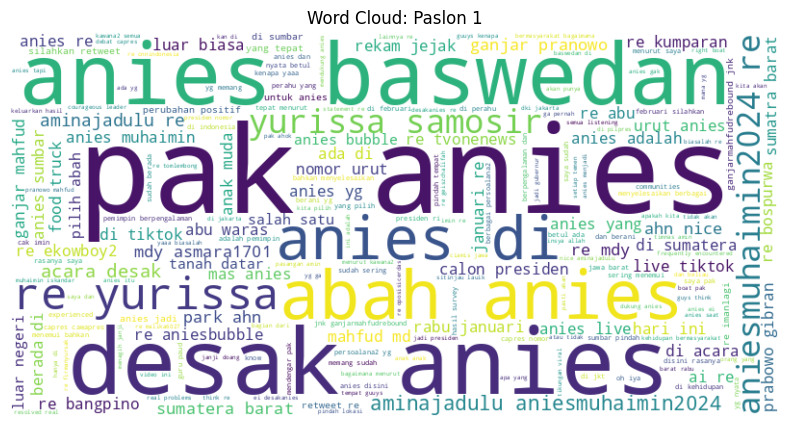

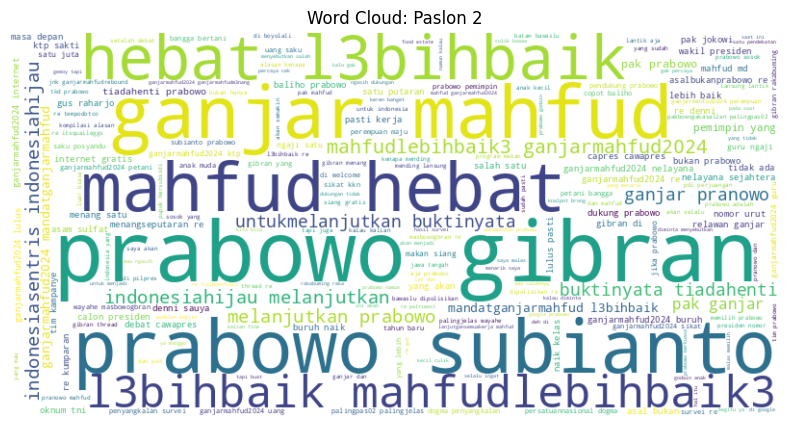

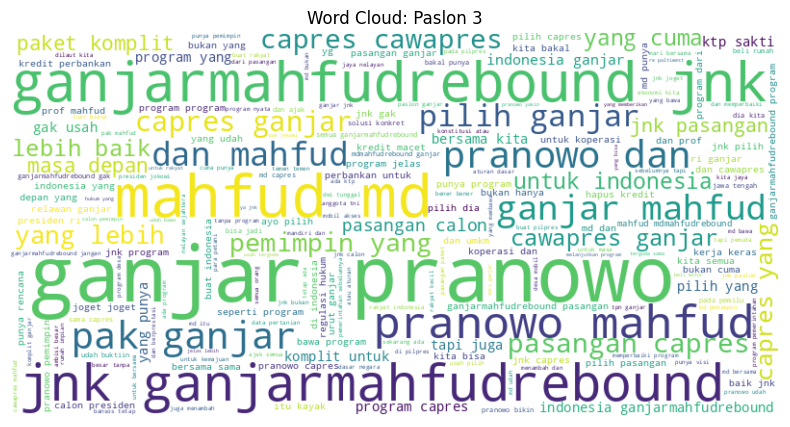

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(KampanyeLUR_baru_subset, title):
    texts = " ".join(KampanyeLUR_baru_subset['text_clean'].dropna().astype(str))
    if len(texts) < 30:
        print(f"[{title}] terlalu sedikit untuk wordcloud.")
        return
    wc = WordCloud(width=800, height=400, background_color='white').generate(texts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Visualisasi untuk tiap paslon
for paslon in ['Paslon 1', 'Paslon 2', 'Paslon 3']:
    subset = KampanyeLUR_baru[KampanyeLUR_baru['paslon'] == paslon]
    show_wordcloud(subset, f"Word Cloud: {paslon}")


SENTIMEN ANTAR PASLON

In [ ]:
def label_paslon(text):
    text = str(text).lower()
    if any(keyword in text for keyword in ['anies', 'muhaimin', 'amin','desak', 'abah', 'baswedan', 'aminajadulu', 'sumbar', 'amin', 'perubahan']):
        return 'Paslon 1'
    elif any(keyword in text for keyword in ['prabowo', 'gibran', '02', 'gemoy','subianto', 'untukmelanjutkan','buktinyata', 'melanjutkan']):
        return 'Paslon 2'
    elif any(keyword in text for keyword in ['ganjar', 'mahfud', '03','pranowo', 'jnk', 'mahfud', 'ganjarmahfudrebound', 'md','ganjarmahfud2024']):
        return 'Paslon 3'
    else:
        return 'SPAM'

KampanyeLUR_baru['paslon'] = KampanyeLUR_baru['content'].apply(label_paslon)
KampanyeLUR_baru = KampanyeLUR_baru[KampanyeLUR_baru['paslon'] != 'SPAM'].reset_index(drop=True)

In [ ]:
# Kamus sentimen & kata kotor
positif = {"hebat", "bagus", "terbaik", "menang", "mantap", "keren", "juara", "sukses"}
negatif = {"buruk", "benci", "jahat", "bohong", "kalah", "gagal", "jelek", "lemah", "penipu"}
kata_kotor = {"tolol", "goblok", "bajingan", "anjing", "bangsat", "kampret", "cebong","asu", "kontol", "memek", "jancuk", "idiot", "pecundang"}

In [ ]:
#Fungsi hitung sentimen
def hitung_sentimen(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    kata_list = text.split()

    skor = sum(1 for kata in kata_list if kata in positif) - sum(1 for kata in kata_list if kata in negatif)
    if any(k in kata_list for k in kata_kotor):
        return "Kata Kotor"
    elif skor > 0:
        return "Positif"
    elif skor < 0:
        return "Negatif"
    else:
        return "Netral"

KampanyeLUR_baru['sentimen'] = KampanyeLUR_baru['content'].apply(hitung_sentimen)

# Distribusi sentimen per paslon
sentimen_per_paslon = KampanyeLUR_baru.groupby(['paslon', 'sentimen']).size().unstack(fill_value=0)
print(sentimen_per_paslon)

sentimen  Kata Kotor  Negatif  Netral  Positif
paslon                                        
Paslon 1          41      568   20122     2149
Paslon 2          39      328   13761     3487
Paslon 3          15       23    7779      634


In [ ]:
# Analisis arah serangan
def target_serangan(row):
    text = str(row['content']).lower()
    if row['sentimen'] in ["Negatif", "Kata Kotor"]:
        if row['paslon'] == "Paslon 1" and any(k in text for k in ['prabowo', 'gibran', 'ganjar', 'mahfud']):
            return "Menyerang lawan"
        if row['paslon'] == "Paslon 2" and any(k in text for k in ['anies', 'muhaimin', 'ganjar', 'mahfud']):
            return "Menyerang lawan"
        if row['paslon'] == "Paslon 3" and any(k in text for k in ['anies', 'muhaimin', 'prabowo', 'gibran']):
            return "Menyerang lawan"
    return "Tidak Menyerang"

KampanyeLUR_baru['arah_serangan'] = KampanyeLUR_baru.apply(target_serangan, axis=1)

# === 7. Hitung jumlah serangan per paslon ===
serangan_per_paslon = KampanyeLUR_baru.groupby('paslon')['arah_serangan'].value_counts()
print(serangan_per_paslon)

paslon    arah_serangan  
Paslon 1  Tidak Menyerang    22801
          Menyerang lawan       79
Paslon 2  Tidak Menyerang    17573
          Menyerang lawan       42
Paslon 3  Tidak Menyerang     8451
Name: count, dtype: int64


In [ ]:
import plotly.express as px

#Pie Chart: Distribusi Sentimen per Paslon
sentimen_group = KampanyeLUR_baru.groupby(['paslon', 'sentimen']).size().reset_index(name='jumlah')

for paslon in sentimen_group['paslon'].unique():
    subset = sentimen_group[sentimen_group['paslon'] == paslon]

    fig = px.pie(
        subset,
        names='sentimen',
        values='jumlah',
        template='seaborn'
    )
    fig.update_traces(rotation=90, textinfo="percent+label")
    fig.update_layout(
        title=f"Distribusi Sentimen - {paslon}",
        title_x=0.5
    )
    fig.show()

# 2. Bar Plot: Jumlah Black Campaign per Paslon
serangan_group = KampanyeLUR_baru[KampanyeLUR_baru['arah_serangan'] == "Menyerang lawan"].groupby('paslon').size().reset_index(name='jumlah_serangan')

fig = px.bar(
    serangan_group,
    x='paslon',
    y='jumlah_serangan',
    title='Jumlah Black Campaign (Menyerang Lawan) per Paslon',
    labels={'jumlah_serangan': 'Jumlah Tweet'},
    text_auto=True,
    color='paslon',
    template='seaborn'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Pastikan waktu dalam datetime
KampanyeLUR_baru['created_at'] = pd.to_datetime(KampanyeLUR_baru['created_at'], errors='coerce', format='%m/%d/%y %H:%M')
KampanyeLUR_baru['jam'] = KampanyeLUR_baru['created_at'].dt.hour
KampanyeLUR_baru['tanggal'] = KampanyeLUR_baru['created_at'].dt.date
KampanyeLUR_baru['hari'] = KampanyeLUR_baru['created_at'].dt.day_name()

# Filter hanya black campaign
kampany_gelap = KampanyeLUR_baru[KampanyeLUR_baru['arah_serangan'] == "Menyerang lawan"]

# Bar Plot: Distribusi Black Campaign per Jam
black_per_jam = kampany_gelap.groupby('jam').size().reset_index(name='jumlah_black')

fig = px.bar(
    black_per_jam,
    x='jam',
    y='jumlah_black',
    title='Distribusi Black Campaign per Jam',
    labels={'jam': 'Jam', 'jumlah_black': 'Jumlah Tweet Black Campaign'},
    text_auto=True,
    template='seaborn',
    color='jumlah_black'
)
fig.update_layout(title_x=0.5, xaxis=dict(dtick=1))
fig.show()

# Bar Plot: Total Retweet Black Campaign per Paslon
retweet_per_paslon = kampany_gelap.groupby('paslon')['num_retweets'].sum().reset_index()

fig = px.bar(
    retweet_per_paslon,
    x='paslon',
    y='num_retweets',
    title='Total Retweet dari Black Campaign per Paslon',
    labels={'num_retweets': 'Total Retweet'},
    text_auto=True,
    color='paslon',
    template='seaborn'
)
fig.update_layout(title_x=0.5)
fig.show()

# Bar Plot: Black Campaign per Hari
black_per_hari = kampany_gelap.groupby('hari').size().reset_index(name='jumlah_black')

fig = px.bar(
    black_per_hari,
    x='hari',
    y='jumlah_black',
    title='Distribusi Black Campaign per Hari',
    labels={'hari': 'Hari', 'jumlah_black': 'Jumlah Tweet Black Campaign'},
    text_auto=True,
    template='seaborn',
    color='jumlah_black'
)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
# Filter black campaign
black_df = KampanyeLUR_baru[KampanyeLUR_baru['arah_serangan'] == "Menyerang lawan"].copy()

# Hitung jumlah black campaign per hari
black_per_tanggal = black_df.groupby('tanggal').size().reset_index(name='jumlah_black')

# Ambil 3 hari teratas
top3_hari = black_per_tanggal.sort_values(by='jumlah_black', ascending=False).head(3)['tanggal'].tolist()

# Filter data hanya untuk 3 hari tersebut
black_top3 = black_df[black_df['tanggal'].isin(top3_hari)]

# Hitung persebaran per paslon
paslon_persebaran = black_top3.groupby(['tanggal', 'paslon']).size().reset_index(name='jumlah_black')

# Visualisasi
import plotly.express as px

fig = px.bar(
    paslon_persebaran,
    x='tanggal',
    y='jumlah_black',
    color='paslon',
    text_auto=True,
    title='Persebaran Black Campaign per Paslon di 3 Hari Teratas',
    labels={'jumlah_black': 'Jumlah Tweet Black Campaign', 'tanggal': 'Tanggal'},
    template='seaborn'
)
fig.update_layout(title_x=0.5)
fig.show()


STANDARISASI BUAT KAMPANYE

In [ ]:
import pandas as pd

KampanyeLUR_baru['created_at'] = pd.to_datetime(KampanyeLUR_baru['created_at'], errors='coerce')

# Tambahkan tanggal & jam
KampanyeLUR_baru['tanggal'] = KampanyeLUR_baru['created_at'].dt.date
KampanyeLUR_baru['jam'] = KampanyeLUR_baru['created_at'].dt.hour

In [ ]:
KampanyeLUR_baru['retweet_ratio'] = KampanyeLUR_baru['num_retweets'] / (KampanyeLUR_baru['frn_cnt'] + 1)
KampanyeLUR_baru['influence_score'] = (
    (KampanyeLUR_baru['num_retweets'] * 0.5) +
    (KampanyeLUR_baru['frn_cnt'] * 0.3) +
    (KampanyeLUR_baru['flw_cnt'] * 0.2)
)

# Tandai apakah tweet adalah black campaign
KampanyeLUR_baru['is_black_campaign'] = KampanyeLUR_baru['arah_serangan'].apply(lambda x: 1 if x == "Menyerang lawan" else 0)

# Lihat 10 tweet kampanye dengan skor pengaruh tertinggi
top_tweet = KampanyeLUR_baru.sort_values(by='influence_score', ascending=False).head(10)

print(top_tweet[['created_at', 'tcode', 'num_retweets', 'frn_cnt', 'flw_cnt', 'influence_score', 'content']])

               created_at    tcode  num_retweets  frn_cnt     flw_cnt  \
44485 2024-01-04 15:07:00  mention           2.0     40.0  21445613.0   
47966 2024-01-04 15:21:00  mention           0.0     40.0  21444471.0   
24407 2024-01-03 21:30:00  mention           2.0     40.0  21444219.0   
15810 2024-01-03 12:10:00  mention           1.0     40.0  21442303.0   
17856 2024-01-03 12:18:27  mention           3.0     40.0  21442199.0   
35435 2024-01-02 20:30:00  mention           1.0     40.0  21439440.0   
35434 2024-01-02 20:30:00  mention           0.0     40.0  21439440.0   
3885  2024-01-04 17:17:16  mention           6.0     33.0  11055740.0   
43085 2024-01-04 08:04:10  mention          46.0     50.0   9848345.0   
15544 2024-01-03 12:08:34  mention           4.0     50.0   9848103.0   

       influence_score                                            content  
44485        4289135.6  TKN Resmi Laporkan Bawaslu Jakpus ke DKPP Bunt...  
47966        4288906.2  Aksi 'Jaga Rumah Sen

In [ ]:
import pandas as pd

# Pastikan format waktu benar
KampanyeLUR_baru['created_at'] = pd.to_datetime(KampanyeLUR_baru['created_at'], errors='coerce')
KampanyeLUR_baru['tanggal'] = KampanyeLUR_baru['created_at'].dt.date

# Tambahkan kolom total interaksi
KampanyeLUR_baru['total_interaksi'] = (
    KampanyeLUR_baru['num_retweets'].fillna(0) +
    KampanyeLUR_baru['flw_cnt'].fillna(0) +
    KampanyeLUR_baru['frn_cnt'].fillna(0)
)

# Hasil akhir akan kita simpan di list
hasil_top3 = []

# Loop untuk masing-masing paslon
for p in KampanyeLUR_baru['paslon'].unique():
    df_paslon = KampanyeLUR_baru[KampanyeLUR_baru['paslon'] == p]

    # Hitung jumlah tweet per hari
    jumlah_per_hari = df_paslon.groupby('tanggal').size().reset_index(name='jumlah_tweet')

    # Ambil 3 hari dengan tweet terbanyak
    top3_hari = jumlah_per_hari.sort_values(by='jumlah_tweet', ascending=False).head(3)

    # Hitung total interaksi di 3 hari tersebut
    interaksi_top3 = df_paslon[df_paslon['tanggal'].isin(top3_hari['tanggal'])]['total_interaksi'].sum()

    # Simpan ke hasil
    hasil_top3.append({
        'paslon': p,
        'top3_hari': top3_hari,
        'total_interaksi_top3hari': interaksi_top3
    })

# Cetak hasil
for h in hasil_top3:
    print(f"\n=== {h['paslon']} ===")
    print("Top 3 hari terbanyak tweet:")
    print(h['top3_hari'])
    print(f"Total interaksi di 3 hari tersebut: {h['total_interaksi_top3hari']}")



=== Paslon 1 ===
Top 3 hari terbanyak tweet:
      tanggal  jumlah_tweet
2  2024-01-04         10075
0  2024-01-02          7455
1  2024-01-03          5350
Total interaksi di 3 hari tersebut: 222854106.0

=== Paslon 2 ===
Top 3 hari terbanyak tweet:
      tanggal  jumlah_tweet
1  2024-01-03          6489
2  2024-01-04          5794
0  2024-01-02          5332
Total interaksi di 3 hari tersebut: 337918289.0

=== Paslon 3 ===
Top 3 hari terbanyak tweet:
      tanggal  jumlah_tweet
2  2024-01-04          3694
1  2024-01-03          2916
0  2024-01-02          1841
Total interaksi di 3 hari tersebut: 186547955.0
